In [185]:
import os
import re
import sys
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to C:\Users\TSJ
[nltk_data]     Avenue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\TSJ
[nltk_data]     Avenue\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TSJ
[nltk_data]     Avenue\AppData\Roaming\nltk_data...


True

In [186]:
#Function Definations for data preprocessing 

#Declarations of stop words
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#remove all the punctuation marks
def remove_punctuations(text):
    #get and print all the punctuation marks in the English language
    punctuations_list = string.punctuation
    
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
#remove stop words from a piece of text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])

#remove repearting characters; nooooooo, yessss, etc
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

#remove all links in the tweets
def remove_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

#remove numbers from the tweets
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

#lemmatize the tweets
def lemmatize_tweet(data):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in data]
    return data

#if a link didn't start with 'www' but 'http(s) remove it'
def remove_https(text):
  partial_list = text.split(" ")
  ans = ""
  for ele in partial_list:
    if(ele.startswith("http")):
      pass
    else:
      ans+=ele+" "
  return ans

#remove hashtags from the tweets
def remove_hashtags(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("#")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

  #remove username mentions from the tweets
def remove_mentions(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("@")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

In [187]:
#Function Definations for data preprocessing 

#Declarations of stop words
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#remove all the punctuation marks
def remove_punctuations(text):
    #get and print all the punctuation marks in the English language
    punctuations_list = string.punctuation
    
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
#remove stop words from a piece of text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])

#remove repearting characters; nooooooo, yessss, etc
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

#remove all links in the tweets
def remove_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

#remove numbers from the tweets
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

#lemmatize the tweets
def lemmatize_tweet(data):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in data]
    return data

#if a link didn't start with 'www' but 'http(s) remove it'
def remove_https(text):
  partial_list = text.split(" ")
  ans = ""
  for ele in partial_list:
    if(ele.startswith("http")):
      pass
    else:
      ans+=ele+" "
  return ans

#remove hashtags from the tweets
def remove_hashtags(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("#")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

  #remove username mentions from the tweets
def remove_mentions(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("@")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

In [188]:
#read the csv file
originalBeforeData = pd.read_csv("elevy_tweets-BEFORE.csv")
originalBeforeData.describe()

,Unnamed: 0
count,15000.000000
mean,7499.500000
std,4330.271354
min,0.000000
25%,3749.750000
50%,7499.500000
75%,11249.250000
max,14999.000000


In [189]:
originalBeforeData.head(4)

,Unnamed: 0,date,username,displayname,location,language,tweet
0,0,2022-04-29 23:47:55+00:00,AccraSmall,ACCRA SMALL,"Accra, Ghana",en,@AnnanPerry Rev the sacrifice is not problem o...
1,1,2022-04-29 23:39:08+00:00,Artgodtonique,VOLTABOYINACCRA🇬🇭🇳🇬,"Accra, Ghana",en,"___To escape e-levy, why don’t you let the sen..."
2,2,2022-04-29 23:38:32+00:00,TastyTweets__,Tasty Tweets,Planet Earth,en,Please read while you get ready for E-Levy Sun...
3,3,2022-04-29 23:35:20+00:00,supreme_ebo,E. B. Baiden,"Greater Accra, Ghana",en,@KobbyKyei_ @thecharactersgh They have success...


In [190]:
#check tweet language
originalBeforeData['language'].value_counts()

en     13238
fr       372
hu       268
pt       189
in       154
tl       149
ht       104
qme       93
fi        86
es        76
und       50
nl        44
no        36
qht       28
cs        19
it        18
ja        15
iw         9
ca         8
da         7
et         7
de         7
pl         6
ro         5
cy         3
qam        2
tr         2
hi         2
sv         2
lt         1
Name: language, dtype: int64

In [191]:
#drop all tweets that are not in English
indexOfLang = originalBeforeData[(originalBeforeData['language'] != 'en')].index
originalBeforeData.drop(indexOfLang , inplace=True)

#recheck poster location
originalBeforeData['language'].value_counts()

en    13238
Name: language, dtype: int64

In [192]:
#check poster location
originalBeforeData['location'].value_counts()

Accra, Ghana                     1727
Ghana                            1255
Greater Accra, Ghana              593
Tema /Ghana /West  /Africanm      414
Kumasi, Ghana                     336
                                 ... 
AppleHub                            1
Gold Coast,Ghana                    1
Ghana, Africa                       1
 Kumasi, Ghana                      1
22 Samora Machel street|Accra       1
Name: location, Length: 1682, dtype: int64

In [193]:
#get the needed data, the TWEETS
analysisData = originalBeforeData[['date', 'tweet']]

In [194]:
#make all tweets lowercase
analysisData['processed'] = analysisData['tweet'].str.lower()
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\2702797206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['tweet'].str.lower()


0    @annanperry rev the sacrifice is not problem o...
1    ___to escape e-levy, why don’t you let the sen...
2    please read while you get ready for e-levy sun...
3    @kobbykyei_ @thecharactersgh they have success...
4    like play like play the e levy is a reality no...
Name: processed, dtype: object

In [195]:
analysisData['processed'] = analysisData['processed'].apply(lambda text: remove_stopwords(text))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\4113344469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda text: remove_stopwords(text))


0    @annanperry rev sacrifice not problem oo ready...
1    ___to escape e-levy, don’t let sender rather a...
2    please read get ready e-levy sunday...📝 #elevy...
3    @kobbykyei_ @thecharactersgh successfully esca...
4                like play like play e levy reality ….
Name: processed, dtype: object

In [196]:
#Removing Link/Url From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_URLs(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\3057260679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_URLs(tweet))


0    @annanperry rev sacrifice not problem oo ready...
1    ___to escape e-levy, don’t let sender rather a...
2     please read get ready e-levy sunday...📝 #elevy  
3    @kobbykyei_ @thecharactersgh successfully esca...
4                like play like play e levy reality ….
Name: processed, dtype: object

In [197]:
#Removing Hashtags From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_hashtags(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\1445621100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_hashtags(tweet))


0    @annanperry rev sacrifice not problem oo ready...
1    ___to escape e-levy, don’t let sender rather a...
2           please read get ready e-levy sunday...📝   
3    @kobbykyei_ @thecharactersgh successfully esca...
4               like play like play e levy reality …. 
Name: processed, dtype: object

In [198]:
#Removing user mentions From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_mentions(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\3488703385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_mentions(tweet))


0    rev sacrifice not problem oo ready pay anythin...
1    ___to escape e-levy, don’t let sender rather a...
2          please read get ready e-levy sunday...📝    
3    successfully escaped e levy. away bus never se...
4              like play like play e levy reality ….  
Name: processed, dtype: object

In [199]:
#Removing Punctuations From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_punctuations(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\4108601039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_punctuations(tweet))


0    rev sacrifice not problem oo ready pay anythin...
1    to escape elevy don’t let sender rather allow ...
2              please read get ready elevy sunday📝    
3    successfully escaped e levy away bus never see...
4               like play like play e levy reality …  
Name: processed, dtype: object

In [200]:
#Removing Duplicate Characters From tweet
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_repeating_char(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\1192953367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_repeating_char(tweet))


0    rev sacrifice not problem oo ready pay anythin...
1    to escape elevy don’t let sender rather allow ...
2              please read get ready elevy sunday📝    
3    successfully escaped e levy away bus never see...
4               like play like play e levy reality …  
Name: processed, dtype: object

In [201]:
#Removing Numeric numbers from the tweets
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_numbers(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\771441043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_numbers(tweet))


0    rev sacrifice not problem oo ready pay anythin...
1    to escape elevy don’t let sender rather allow ...
2              please read get ready elevy sunday📝    
3    successfully escaped e levy away bus never see...
4               like play like play e levy reality …  
Name: processed, dtype: object

In [202]:
#Removing https
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_https(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\729992514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: remove_https(tweet))


0    rev sacrifice not problem oo ready pay anythin...
1    to escape elevy don’t let sender rather allow ...
2             please read get ready elevy sunday📝     
3    successfully escaped e levy away bus never see...
4              like play like play e levy reality …   
Name: processed, dtype: object

In [203]:
#Perform lemmatization
analysisData['processed'] = analysisData['processed'].apply(lambda tweet: lemmatize_tweet(tweet))
analysisData['processed'].head(5)

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\318354429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData['processed'] = analysisData['processed'].apply(lambda tweet: lemmatize_tweet(tweet))


0    rev sacrifice not problem oo ready pay anythin...
1    to escape elevy don’t let sender rather allow ...
2             please read get ready elevy sunday📝     
3    successfully escaped e levy away bus never see...
4              like play like play e levy reality …   
Name: processed, dtype: object

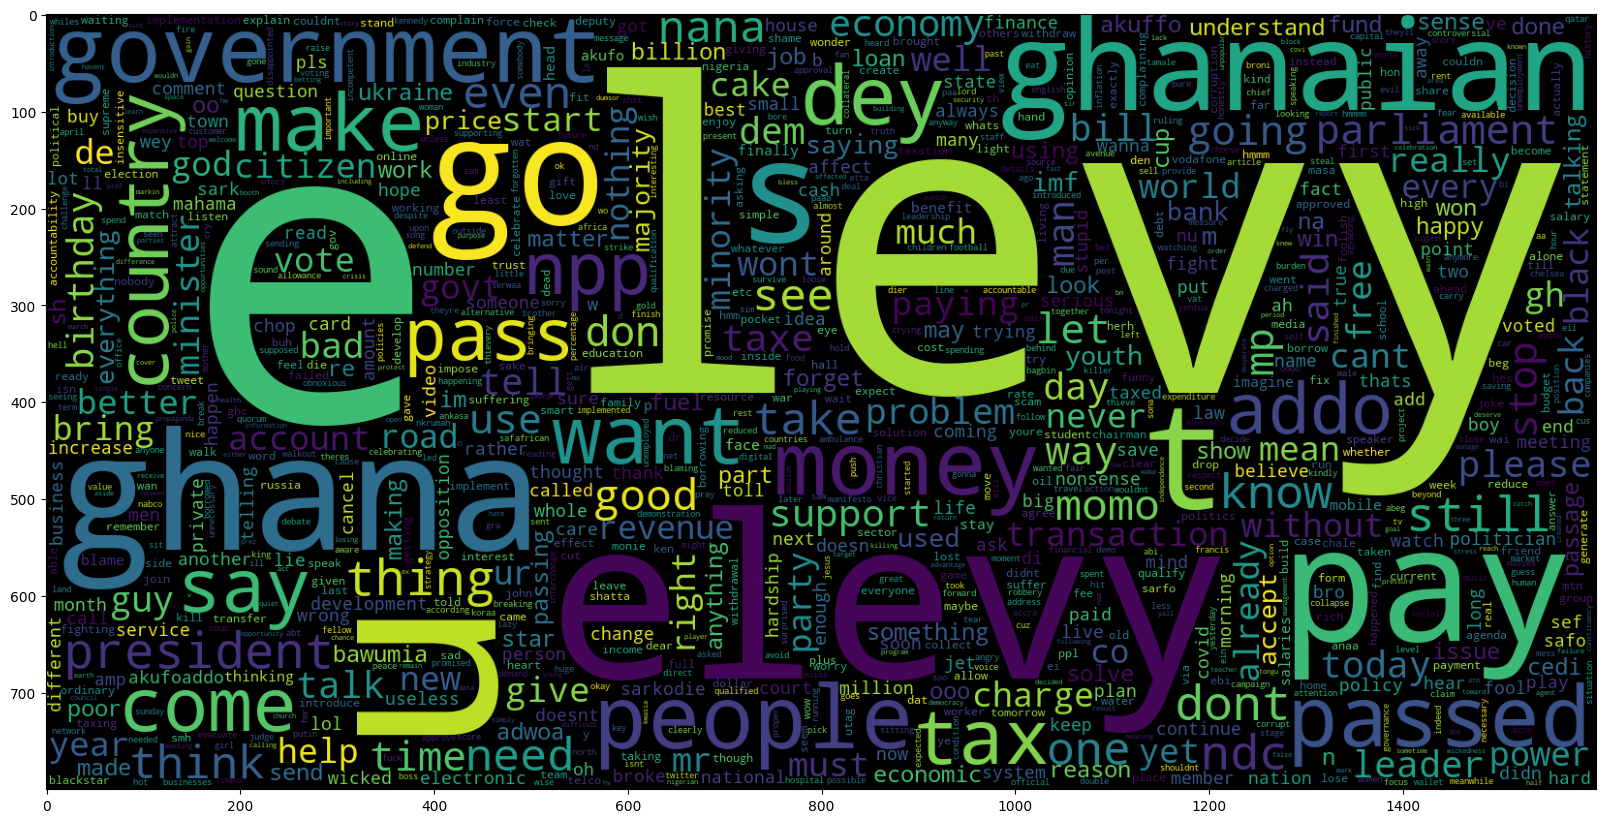

In [204]:
#create the wordcloud
data_pos = analysisData['processed']
wordCloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wordCloud)

In [205]:
#get percentage representation
def percentage(part):
 return 100 * float(part)/float(analysisData['tweet'].count())

In [206]:
#calculate polarity scores
sentiments = SentimentIntensityAnalyzer()

#for each tweet in the column, calculate its polarity score and assign that value to a new column
analysisData["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in analysisData["tweet"]]
analysisData["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in analysisData["tweet"]]
analysisData["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in analysisData["tweet"]]

data = analysisData[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\804927135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in analysisData["tweet"]]
C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\804927135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in analysisData["tweet"]]


                                               tweet  Positive  Negative  \
0  @AnnanPerry Rev the sacrifice is not problem o...     0.085      0.03   
1  ___To escape e-levy, why don’t you let the sen...     0.165      0.00   
2  Please read while you get ready for E-Levy Sun...     0.348      0.00   
3  @KobbyKyei_ @thecharactersgh They have success...     0.186      0.00   
4  Like play like play the e levy is a reality no...     0.620      0.00   

   Neutral  
0    0.884  
1    0.835  
2    0.652  
3    0.814  
4    0.380  


C:\Users\TSJ Avenue\AppData\Local\Temp\ipykernel_7364\804927135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisData["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in analysisData["tweet"]]


In [209]:
#Calculate the sum of all polarities
positive = sum(data["Positive"])
negative = sum(data["Negative"])
neutral = sum(data["Neutral"])

#what is the most frequent label assigned to the tweets according to the sentiment scores?
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😠")
    else:
        print("Neutral 🙂")

sentiment_score(positive, negative, neutral)

Neutral 🙂


In [210]:
#So the most of the tweets are neutral, which means they are neither positive nor negative.
#Now let’s have a look at the total of the sentiment scores:
print("Positive: ", positive)
print("Negative: ", negative)
print("Neutral: ", neutral)

Positive:  1113.0289999999984
Negative:  1104.7870000000005
Neutral:  11020.196999999996


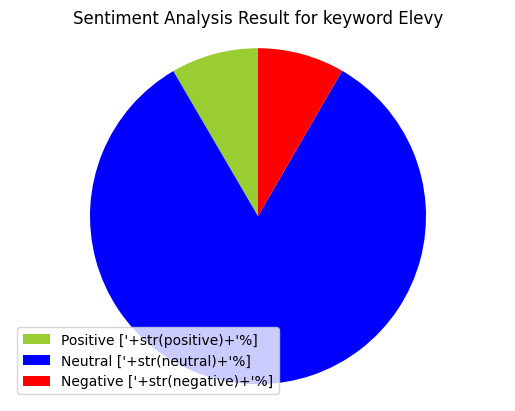

In [213]:
#Creating PieCart
labels = ["Positive ['+str(positive)+'%]", "Neutral ['+str(neutral)+'%]", "Negative ['+str(negative)+'%]"]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)

plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Elevy")
plt.axis('equal')
plt.show()